# KNN

In [1]:
import numpy as np
import pandas as pd
import time
from scipy.spatial.distance import euclidean
from scipy import stats
from matplotlib import pyplot as plt

## Roadmap
1. Calculate all distancies between known and unknown points
2. Predict class of unknown point by the k nearest neighbours



In [2]:
def calc_all_distancies(data_x, unknown):
    '''
        Function calculates distancies between each pairs of known and unknown points
    '''
    return np.sqrt(np.sum(np.power(data_x - unknown[:,np.newaxis], 2),axis=2))

In [3]:
def predict(dists, data_y, k):
    '''
        Function predicts the class of the unknown point by the k nearest neighbours
    '''
    nearest_k_idx = (np.argpartition(dists.T, k, axis=0) [:k]).T
    nearest_y_values = data_y[nearest_k_idx] #values of k nearest neighbours
    unique, counts = np.unique(nearest_y_values, return_counts=True, axis=1)
    return unique[:,np.argmax(counts)]


In [4]:
def accuracy(predicted,real):
    '''
        Calculates accuracy percentage
    '''
    correct = sum(predicted == real)
    total = len(predicted)
    return 100*correct/total

In [5]:
def compare_k(data_x, data_y, test_x, test_y, kmin=1, kmax=50, kstep=4):
    '''
        Main comparing function
    '''
    k = list(range(kmin, kmax, kstep))
    steps = len(k)
    features = np.zeros((steps,3))
    
    print('Evaluating distancies started')
    
    t0 = time.time()
    distancies = calc_all_distancies(data_x,test_x)
    miss = []
    t = time.time()
    s1 = data_x.shape[0]
    s2 = test_x.shape[0]
    
    print('Distancies completed in %d seconds for %dx%d' %(t-t0,s1,s2))
    
    for j in range(steps):
        t0 = time.time()
        yk = predict(distancies,data_y,k[j])
        t = time.time() - t0
        features[j][0] = k[j]
        features[j][1] = accuracy(yk,test_y)
        features[j][2] = t
        cond = yk!=test_y
        miss.append({
            'k':k[j],
            'acc':features[j][1],
            'x':test_x[cond]}
        )
        
        print('k={0}, accuracy = {1}%, time = {2} sec'.format(k[j],features[j][1],features[j][2]))
        
    return features, miss

In [6]:
num_observations = 300
x1 = np.random.multivariate_normal([0, 0], [[1, .75], [.75, 1]], num_observations)
x2 = np.random.multivariate_normal([-2, 3], [[2, .75], [.75, 2]], num_observations)


X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations),
               np.ones(num_observations)))



## Select some part of data to be tested

In [7]:
l = len(X)
train_ind = np.ones(l, dtype=bool)
test_part = 0.20
train_ind[np.unique(np.random.randint(1, l, int(test_part * l)))] = False
test_ind = np.logical_not(train_ind)

x_trn = X[train_ind]
y_trn = Y[train_ind]
x_tst = X[test_ind]
y_tst = Y[test_ind]

## Calculate distancies & compare result for different k

In [8]:
res, ms = compare_k(x_trn, y_trn, x_tst, y_tst,1,220,20)

Evaluating distancies started
Distancies completed in 0 seconds for 490x110
k=1, accuracy = 98.18181818181819%, time = 0.0021021366119384766 sec
k=21, accuracy = 98.18181818181819%, time = 0.0031774044036865234 sec
k=41, accuracy = 95.45454545454545%, time = 0.003679990768432617 sec
k=61, accuracy = 99.0909090909091%, time = 0.0035881996154785156 sec
k=81, accuracy = 99.0909090909091%, time = 0.003918647766113281 sec
k=101, accuracy = 95.45454545454545%, time = 0.004386186599731445 sec
k=121, accuracy = 96.36363636363636%, time = 0.004325151443481445 sec
k=141, accuracy = 96.36363636363636%, time = 0.004508018493652344 sec
k=161, accuracy = 94.54545454545455%, time = 0.004531383514404297 sec
k=181, accuracy = 94.54545454545455%, time = 0.004651308059692383 sec
k=201, accuracy = 96.36363636363636%, time = 0.00459599494934082 sec


## Visualisation

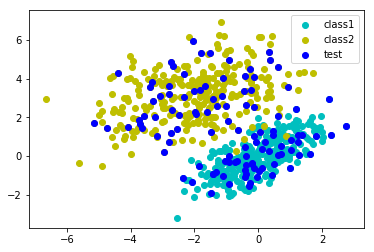

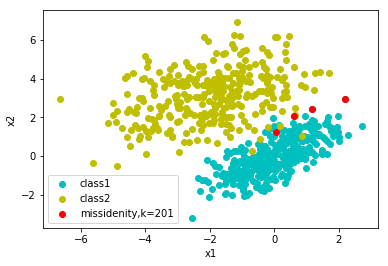

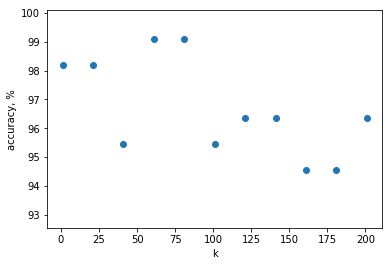

In [9]:
# initial data
fig = plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], color='c',label='class1')
plt.scatter(x2[:, 0], x2[:, 1], color='y',label='class2')
# randomly selected data
plt.scatter(x_tst[:,0],x_tst[:,1],color='b',label='test')
plt.legend(loc='best')


# missidentifies for k = value
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], color='c', label='class1')
plt.scatter(x2[:, 0], x2[:, 1], color='y', label='class2')
plt.scatter(ms[-1]['x'][:,0],ms[-1]['x'][:,1],color='r',label='missidenity,k=%d'%ms[-1]['k'])
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.figure()

# accuracy plot
k = plt.scatter(res[:, 0], res[:, 1])
plt.ylim(min(res[:, 1]) - 2, max(res[:, 1])+1, 4)
plt.xlabel('k')
plt.ylabel('accuracy, %')
plt.show()